In [130]:
import numpy as np
import pandas as pd
np.random.seed(0)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split

import os
import cv2
import sys
from PIL import Image
from pathlib import Path
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [182]:
DATA_PATH = Path('./data')
CATEGORIES = ['no_mask', 'mask']
IMG_SIZE = 100

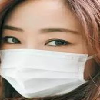

In [184]:
load_img('./data/mask/aidai/0_0_1.jpg', target_size=(IMG_SIZE, IMG_SIZE))

In [193]:
# data preparation
def preprocess_data():
    images = []
    labels = []
    
    for category in CATEGORIES:
        path = DATA_PATH/category

        for directory in tqdm(list(path.iterdir())):
            for imgPath in directory.iterdir():
                img = load_img(imgPath, target_size=(IMG_SIZE, IMG_SIZE))
                img_array = img_to_array(img)
                
                class_num = CATEGORIES.index(category)
                
                images.append(img_array)
                labels.append(class_num)
          
    images = np.array(images)
    labels = np.array(labels)
    
    if np.max(images) > 1: images /= 255
    
    return images, labels

X, y = preprocess_data()

100%|██████████| 525/525 [00:04<00:00, 121.10it/s]


In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [211]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPool2D(pool_size=(2, 2)),

    Flatten(),
    
    Dense(2048, activation='relu'),
    Dense(1028, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 12800)           

In [212]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
          batch_size=128,
          epochs=3,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/3
507/507 [==============================] - 295s 579ms/step - loss: 0.0588 - accuracy: 0.9755 - val_loss: 0.0229 - val_accuracy: 0.9949
Epoch 2/3
507/507 [==============================] - 292s 576ms/step - loss: 0.0186 - accuracy: 0.9956 - val_loss: 0.0221 - val_accuracy: 0.9956
Epoch 3/3
507/507 [==============================] - 281s 555ms/step - loss: 0.0198 - accuracy: 0.9954 - val_loss: 0.0106 - val_accuracy: 0.9968


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))